In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
import seaborn as sns

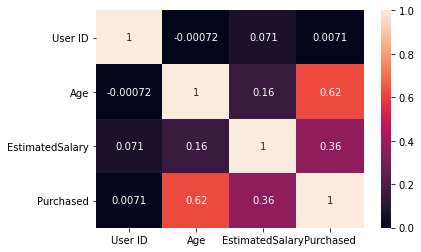

In [12]:
sns.heatmap(data.corr(),annot=True)

# Rules for classification ,if you use sklearn
## 1 Data must be complete
## 2 features must be numeric , labels can be numeric or not
## 3 Data must be represented in numpy array
## 4 features must be 2D array
## 5 labels in 1D array

In [33]:
# seperate data into features and lables
features= data[['Age','EstimatedSalary']]
labels=data['Purchased']

In [18]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=.2,random_state=10)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

train_s=model.score(X_train,y_train)
test_s=model.score(X_test,y_test)

In [24]:
train_s,test_s


(0.640625, 0.65)

# for best random state

In [37]:
for i in range(1,400):
    X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=i)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    
    train_s=model.score(X_train,y_train)
    test_s=model.score(X_test,y_test)
    
    if test_s>train_s:
        print("Test{} Train{} RS{}".format(test_s,train_s,i))

    
    

Test0.6875 Train0.63125 RS3
Test0.7375 Train0.61875 RS4
Test0.6625 Train0.6375 RS5
Test0.65 Train0.640625 RS6
Test0.675 Train0.634375 RS7
Test0.675 Train0.634375 RS8
Test0.65 Train0.640625 RS10
Test0.6625 Train0.6375 RS11
Test0.7125 Train0.625 RS13
Test0.675 Train0.634375 RS16
Test0.7 Train0.628125 RS17
Test0.7 Train0.628125 RS21
Test0.65 Train0.640625 RS24
Test0.6625 Train0.6375 RS25
Test0.75 Train0.615625 RS26
Test0.675 Train0.634375 RS27
Test0.7 Train0.628125 RS28
Test0.6875 Train0.63125 RS29
Test0.6875 Train0.63125 RS31
Test0.6625 Train0.6375 RS37
Test0.7 Train0.628125 RS39
Test0.7 Train0.628125 RS40
Test0.65 Train0.640625 RS42
Test0.725 Train0.621875 RS46
Test0.65 Train0.640625 RS48
Test0.675 Train0.634375 RS50
Test0.65 Train0.640625 RS51
Test0.65 Train0.640625 RS54
Test0.7 Train0.634375 RS55
Test0.65 Train0.640625 RS56
Test0.6625 Train0.6375 RS58
Test0.6875 Train0.63125 RS59
Test0.7 Train0.628125 RS60
Test0.6625 Train0.6375 RS62
Test0.6875 Train0.63125 RS63
Test0.65 Train0.640625

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=4)

In [54]:
# create model

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [55]:
# Ensure your model is a generlaized model

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.61875
0.7375


In [47]:
from sklearn.metrics import confusion_matrix,classification_report


In [56]:
confusion_matrix(y_test,model1.predict(X_test))

array([[59,  0],
       [21,  0]], dtype=int64)

In [58]:
print(classification_report(labels,model1.predict(features)))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       257
           1       0.00      0.00      0.00       143

    accuracy                           0.64       400
   macro avg       0.32      0.50      0.39       400
weighted avg       0.41      0.64      0.50       400

